<a href="https://colab.research.google.com/github/evi03/MechineLearning/blob/main/Mechine_Learning_UTS_13_EVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UTS**

**KELOMPOK 2**

Nama: Evi Amalia Midfia

Kelas: TI-3A

Absen: 13

NIM: 2141720030

### **Persiapan Data**

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import MiniBatchKMeans
import glob

# Load Gambar
images = []
for img in glob.glob("/content/drive/MyDrive/Tugas Kuliah /Pembelajaran Mesin/UTS/*"):
    n= cv2.imread(img)
    images.append(n)

### **Preprocessing**

In [27]:
def scale_data(img): #
    h, w, ch= img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

> Kode di atas digunakan untuk Preprocessing data
1. `def scale_data(img)`: Mengembalikan data yang telah diolah.
2. `h, w, ch = img.shape`: Mengambil dimensi gambar dari argumen `img` dan mengekstrak tinggi (h), lebar (w), dan jumlah saluran warna (ch) dari gambar.
3. `data = img / 255.0`: Ini adalah langkah normalisasi dengan membagi setiap piksel gambar dengan 255, dan mengubah rentang nilai piksel dari [0, 255] menjadi [0, 1].
4. `data = data.reshape(h * w, ch)`: Ini mengubah matriks gambar 2D (tinggi x lebar x saluran warna) menjadi matriks 2D baru dengan dimensi (tinggi * lebar, saluran warna).
5. `return data`: Mengembalikan matriks data yang telah dinormalisasikan dan diubah bentuknya.

### **Segmentasi Warna**

In [28]:
def plot_pixels_3d(data, title, colors=None, N=10000, ax=None):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    ax.scatter(R, G, B, c=colors, marker='.')
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    ax.set_title(title, size=14)



> Fungsi kode diatas digunakan untuk visualisasi distribusi warna dalam data. dengan cara mengambil sampel data secara acak, kemudian memisahkan warna (R, G, B), dan kemudian memplotnya ke dalam ruang 3 dimensi.
- `plot_pixels_3d(data, title, colors=None, N=10000, ax=None)`: Fungsi ini digunakan untuk membuat plot tiga dimensi (3D) dari data warna.
- `data`: Merupakan array NumPy yang berisi data warna. Setiap baris array ini mewakili warna dalam format RGB, yaitu tiga saluran warna (R, G, B).
- `title`: Merupakan judul yang akan diberikan pada plot.
- `colors`: Merupakan array yang berisi data warna yang akan digunakan untuk menentukan warna titik-titik dalam plot 3D.
- `N`: Merupakan jumlah titik data yang akan diplot dalam plot 3D.
- `ax`: Merupakan objek sumbu (axis) dari plot 3D yang akan digunakan. Jika tidak diberikan, maka akan mencoba membuat objek sumbu baru.



### **Membandingkan Gambar Original dengan Gambar Baru**

In [29]:
def img_comparison(original, new_colors):
    new_plate = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(new_plate)
    ax[1].set_title('2-color Image', size=16);

> Fungsi kode diatas digunakan untuk membandingkan visual antara kedua gambar, dengan cara membuat dua subplot,  yaitu plot pertama menampilkan gambar original, dan plot yang kedua menampilkan gambar dengan warna baru.
- `img_comparison(original, new_colors)`: Fungsi ini digunakan untuk membandingkan dua gambar, yaitu gambar asli (original) dan gambar yang memiliki warna baru (new_colors).
- `original`: Merupakan gambar asli yang akan ditampilkan dalam subplot pertama.
- `new_colors`: Merupakan gambar yang memiliki warna baru yang akan ditampilkan dalam subplot kedua.

### **Penerapan Algoritma K-Means**

In [30]:
def kmeans_cluster(original):
    data = scale_data(original)
    kmeans = MiniBatchKMeans(2,n_init=3)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

# Membuat sebuah gambar yang menampilkan dua subplot (grafik sisi-sisi)
    # fungsi untuk subplot pertama
    plot_pixels_3d(data, "16 million possible colors", ax=ax1)

    # fungsi untuk subplot kedua
    plot_pixels_3d(data, "2 colors", colors=new_colors, ax=ax2)
    plt.show()
    img_comparison(original, new_colors)

> Fungsi Kode diatas adalah penerapan algoritma K-Means clustering pada gambar, gunanya untuk memvisualisasikan kluster warna dalam gambar dalam bentuk grafik 3D, serta membandingkan antara gambar asli dan gambar yang telah di-kluster.
- `data = scale_data(original)`: Untuk memproses gambar asli (`original`) dan menghasilkan data yang telah dinormalisasi. Ini dilakukan agar data siap untuk digunakan dalam algoritma K-Means.
- `kmeans = MiniBatchKMeans(2, n_init=3)`: Fungsi ini membuat jumlah kluster yang akan dibentuk dengan 2 kluster. `n_init=3` untuk yang mengatur parameter berapa kali inisialisasi kluster akan diulang.
- `kmeans.fit(data)`: Menerapkan Algoritma K-Means pada data yang telah dinormalisasi.
-`new_colors = kmeans.cluster_centers_[kmeans.predict(data)]`: digunakan untuk membandingkan gambar asli dengan gambar yang telah di-kluster. dengan cara mengganti setiap piksel pada gambar dengan **warna tengah kluster** yang sesuai (centroid).

> Selanjutnya, membuat sebuah gambar yang menampilkan dua subplot (grafik sisi-sisi)
- Subplot pertama, menggunakan panggilan `plot_pixels_3d`: digunakan untuk menampilkan representasi ruang warna dalam bentuk 3D dari data awal, dengan title "16 juta warna yang mungkin."
- Subplot kedua, juga menggunakan `plot_pixels_3d`: digunakan untuk menampilkan representasi ruang warna dalam bentuk 3D dari data, dengan warna yang telah di-kluster yaitu 2 warna, dengan title "2 warna."
-`img_comparison(original, new_colors)`: Digunakan untuk membandingkan gambar asli dengan gambar yang telah di-kluster dengan 2 warna.

### **Tampilan perbandingan citra sebelum dan sesudah di segmentasi**

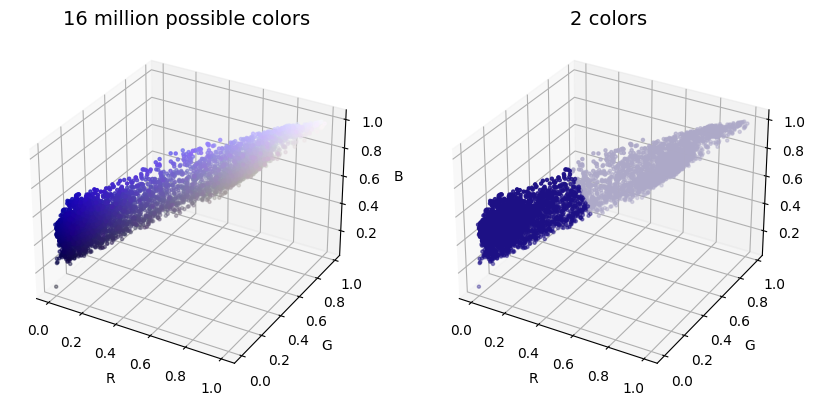

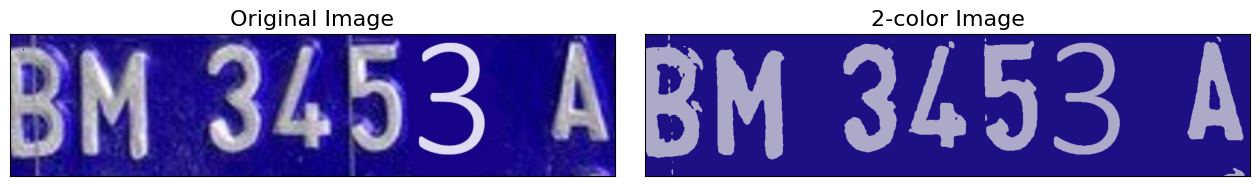

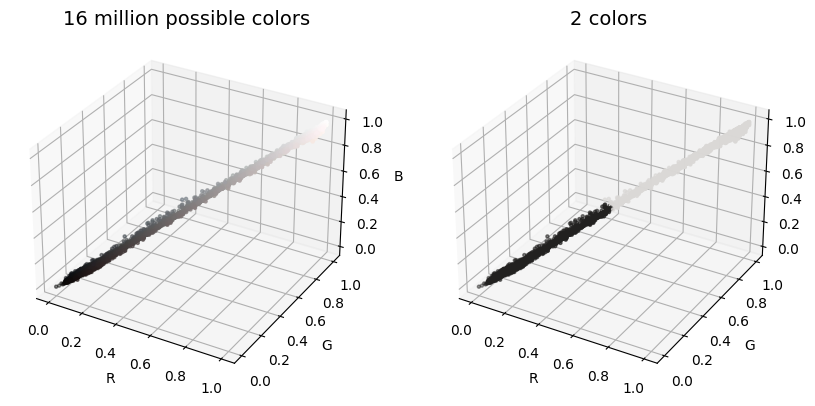

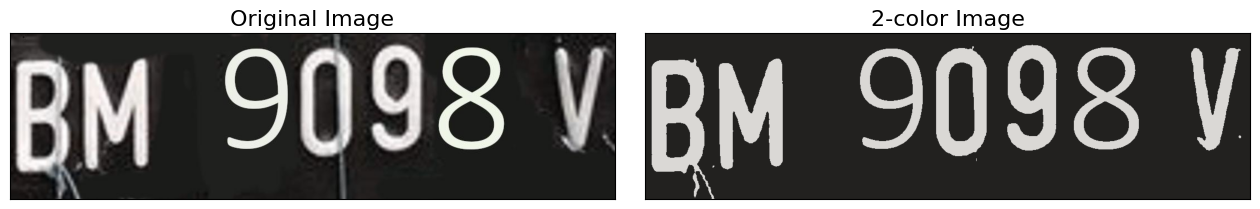

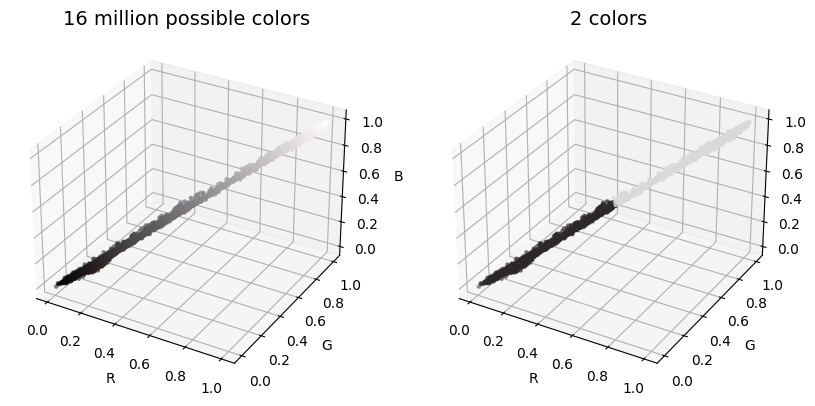

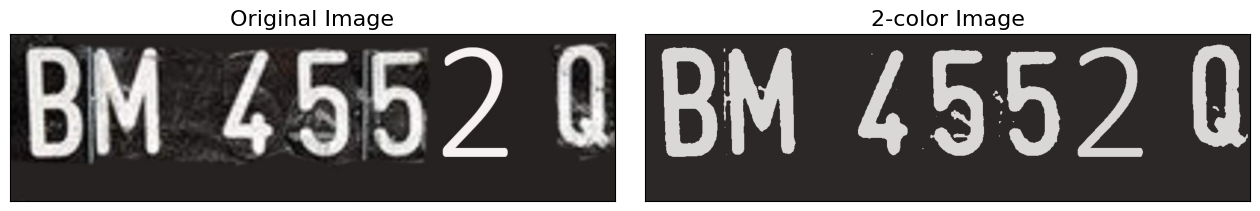

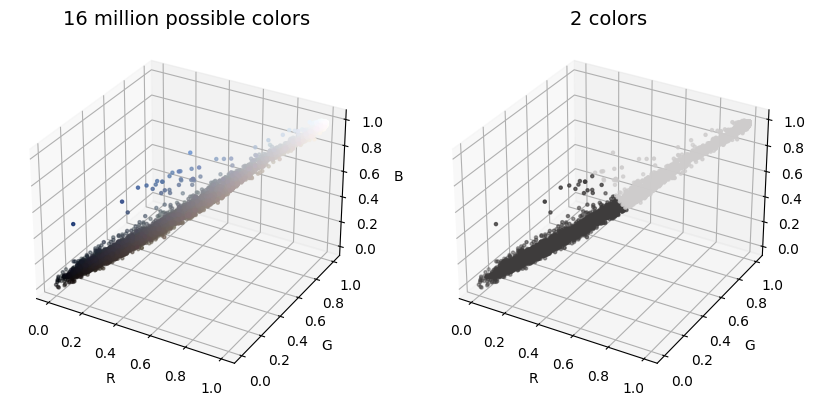

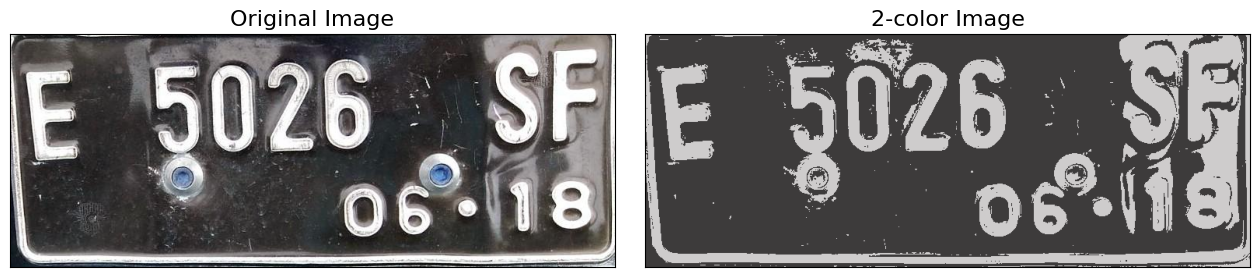

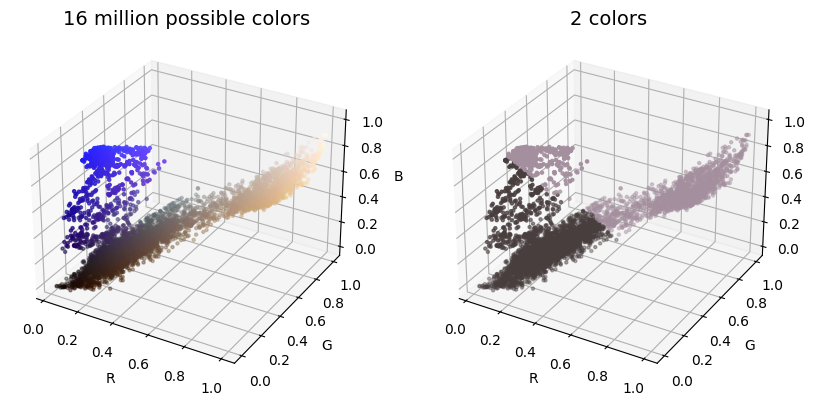

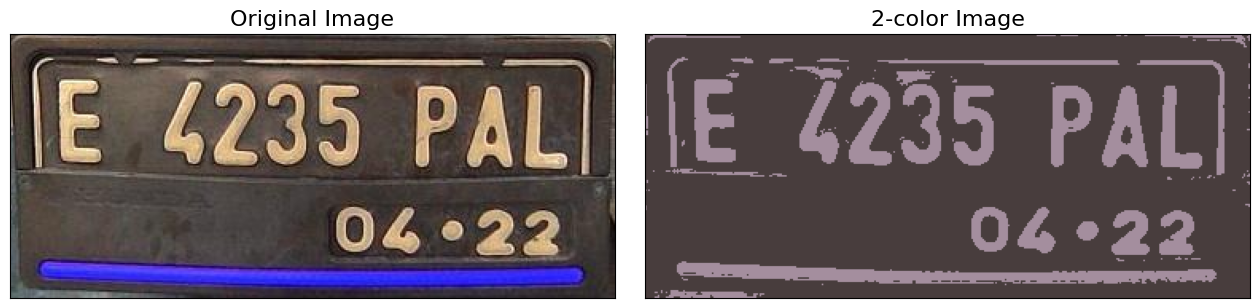

In [31]:
dataset = [0,1,2,3,4]
for data in dataset:
    kmeans_cluster(images[data])